In [1]:
import pandas as pd
import numpy as np

import io, json
from IPython.display import display
from ipywidgets import interact, fixed

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Exploratory Phase

## Read in JSON Data

In [2]:
path = '/data/primitiveDataType/data.json'

def load_data(path):
    jsons = open(path, 'r')
    data = json.load(jsons)
    
    professors, professor_stats, stats_by_grade_list, reviews_by_grade = data
    
    professors = pd.read_json(professors, orient='index') #don't drop index
    professor_stats = pd.read_json(professor_stats, orient='index')# drop index
    
    professor_stats_by_grade_list = []
    
    for p in stats_by_grade_list: 
        professor_stats_by_grade_list.append(pd.read_json(p, orient='index'))

    reviews_by_grade = pd.read_json(data[3], orient='index').reset_index(drop=True)
    
    return professors, professor_stats, professor_stats_by_grade_list, reviews_by_grade
    
professors, p_stats, reviews_by_grade_list, reviews_by_grade = load_data(path)

In [3]:
assert type(professors['Dept'].values[0]) == str
professors.head()

,Dept,Name,Reporting Evaluations,prof_id
0,Chemistry and Biochemistry,Christina Abel,32,2073
1,Aerospace Engineering,Kira Aberbromby,6,2390
10,Electrical Engineering,Samuel Agbo,54,4
100,English,Jacquelyn Belknap,26,2928
1000,English,Sadie J Martin,13,1855


In [4]:
assert type(p_stats['std_dev'].values[0]) == np.float64
p_stats.head()

,mean,median,mode,prof_id,rating_type,std_dev
0,3.563,4,4,2073,Overall Rating,0.556
1,3.594,4,4,2073,Presents Material Clearly,0.551
10,3.941,0,4,1,Presents Material Clearly,0.235
100,2.700,3,4,3500,Presents Material Clearly,1.418
1000,1.000,1,1,146,Presents Material Clearly,0.791


In [5]:
assert type(reviews_by_grade_list[0]['prof_id'].values[0]) == np.int64
reviews_by_grade_list[0].head()

,A,B,C,Credit,D,F,N/A,No Credit,prof_id
Overall Rating,3.769,3.222,3.75,NaN,3,NaN,3,NaN,2073
Presents Material Clearly,3.769,3.222,3.75,NaN,3,NaN,4,NaN,2073
Recognizes Student Difficulties,3.692,3.222,3.75,NaN,4,NaN,3,NaN,2073
Reporting Evaluations,13.000,9.000,8.00,NaN,1,NaN,1,NaN,2073


In [6]:
assert type(reviews_by_grade['prof_id'].values[0]) == np.int64
reviews_by_grade.head()

,Course,Grade,Overall Rating,Presents Material Clearly,Recognizes Student Difficulties,Reporting Evaluations,Review,Year,prof_id,review_id
0,CHEM 124,A,3.769,3.769,3.692,13,"To do well in Abel's class, the key is practic...",Freshman,2073,34359
1,CHEM 127,A,3.769,3.769,3.692,13,Great professor! I learned a lot in her class....,Freshman,2073,34176
2,CHEM 124,A,3.769,3.769,3.692,13,Dr. Abel is a great chem prof. I would recomme...,Freshman,2073,31660
3,PHIL 126,B,2.800,3.143,2.400,35,Abney's first day of class was a bitter one. H...,Junior,2,11083
4,BUS 215,B,3.400,3.300,3.400,10,Anderson is a good teacher. In his class you ...,Senior,12,10145


In [7]:
len(reviews_by_grade)

54451

# Explore Reviews
###  Compare Relationships Between Mean Rating Categories

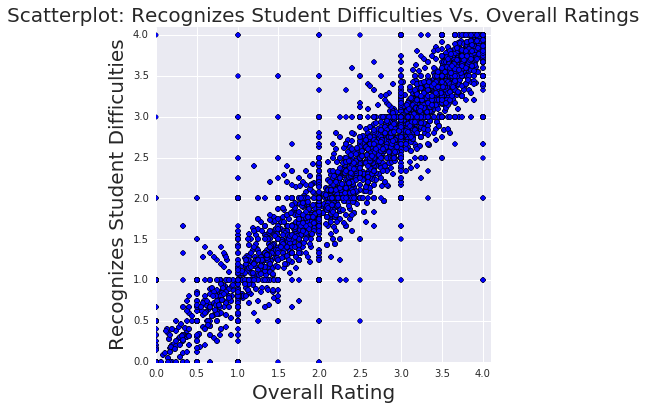

In [8]:
f = plt.figure()
f.set_size_inches(6, 6, forward=True)

plt.xlim([0, 4.1])
plt.ylim([0, 4.1])
plt.scatter(reviews_by_grade['Overall Rating'], \
            reviews_by_grade['Recognizes Student Difficulties'])
plt.xlabel('Overall Rating', fontsize='20')
plt.ylabel('Recognizes Student Difficulties', fontsize='20')
plt.title('Scatterplot: Recognizes Student Difficulties Vs. Overall Ratings', \
           fontsize='20')

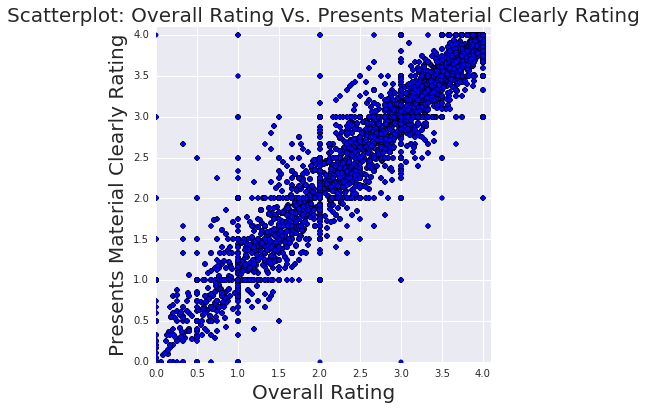

In [9]:
f = plt.figure()
f.set_size_inches(6, 6, forward=True)

plt.xlim([0, 4.1])
plt.ylim([0, 4.1])
plt.scatter(reviews_by_grade['Overall Rating'], \
            reviews_by_grade['Presents Material Clearly'])
plt.xlabel('Overall Rating', fontsize='20')
plt.ylabel('Presents Material Clearly Rating', fontsize='20')
plt.title('Scatterplot: Overall Rating Vs. Presents Material Clearly Rating', \
           fontsize='20')



## Explore with Groupby Objects

In [10]:
overall_grouped = \
    reviews_by_grade.groupby(['prof_id', 'Grade'])['Overall Rating']
    
presents_grouped = \
    reviews_by_grade.groupby(['prof_id', 'Grade'])['Presents Material Clearly']
    
recdiffs_grouped = \
    reviews_by_grade.groupby(['prof_id', 'Grade'])['Recognizes Student Difficulties']

In [11]:
overall_grouped.value_counts()

prof_id  Grade      Overall Rating
1        A          4.000              8
         B          3.600              5
         D          3.000              1
         N/A        4.000              3
2        A          2.947             19
         B          2.800             35
         C          1.886             35
         Credit     2.900             10
         D          0.769             13
         F          4.000              1
         N/A        2.083             24
         No Credit  0.000              1
4        A          1.900             11
         B          1.188             18
         C          1.615             13
         N/A        0.800             15
5        A          4.000             29
         B          3.909             25
         C          3.588             18
         D          2.500              3
         F          2.250              4
         N/A        3.750              5
6        A          3.250              4
         B          1.

In [12]:
presents_grouped.value_counts()

prof_id  Grade      Presents Material Clearly
1        A          4.000                         8
         B          3.800                         5
         D          4.000                         1
         N/A        4.000                         3
2        A          3.158                        19
         B          3.143                        35
         C          2.057                        35
         Credit     3.400                        10
         D          1.154                        13
         F          4.000                         1
         N/A        2.458                        24
         No Credit  2.000                         1
4        A          2.100                        11
         B          1.250                        18
         C          1.462                        13
         N/A        0.867                        15
5        A          4.000                        29
         B          3.818                        25
         C        

In [13]:
recdiffs_grouped.value_counts()

prof_id  Grade      Recognizes Student Difficulties
1        A          3.875                               8
         B          3.400                               5
         D          3.000                               1
         N/A        4.000                               3
2        A          2.632                              19
         B          2.400                              35
         C          1.657                              35
         Credit     2.300                              10
         D          0.615                              13
         F          4.000                               1
         N/A        1.875                              24
         No Credit  1.000                               1
4        A          1.400                              11
         B          0.938                              18
         C          1.308                              13
         N/A        0.600                              15
5        A          

# Overall Rating Vs. Grade

In [14]:
order=['A', 'B', 'C', 'D', 'F', 'No Credit', 'Credit', 'N/A']

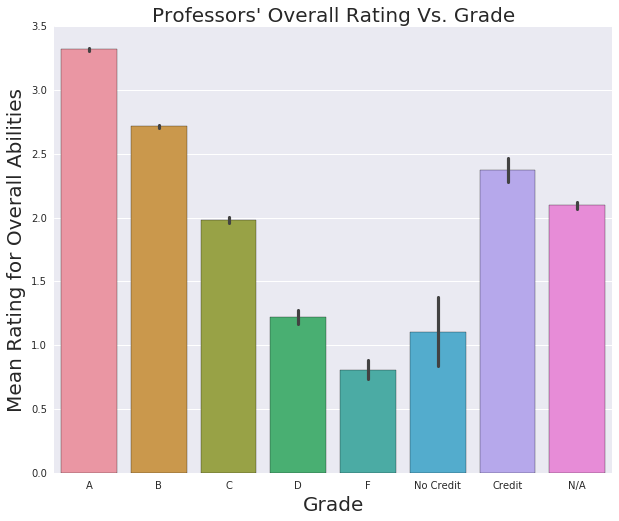

In [15]:
f = plt.figure()
f.set_size_inches(10, 8, forward=True)

sns.barplot(reviews_by_grade['Grade'], reviews_by_grade['Overall Rating'], order=order)
plt.xlabel('Grade', fontsize='20')
plt.ylabel('Mean Rating for Overall Abilities', fontsize='20')
plt.title('Professors\' Overall Rating Vs. Grade', fontsize='20')

# Ability to Present Rating Vs. Grade

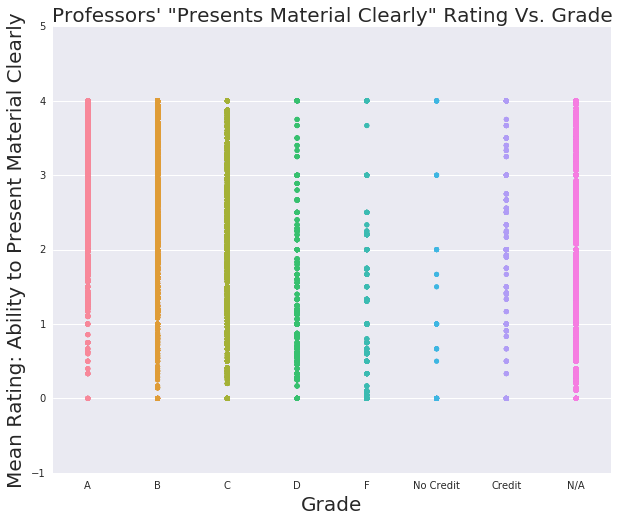

In [16]:
def plot_present_ratings(): 
    '''
    Plots the professors' ratings on 
        'Ability to Present Material Clearly'
            vs.
        'Grade'
    '''
    f_2 = plt.figure()
    f_2.set_size_inches(10, 8, forward=True)

    sns.stripplot(reviews_by_grade['Grade'], \
                  reviews_by_grade['Presents Material Clearly'], order=order)
    plt.xlabel('Grade', fontsize='20')
    plt.ylabel('Mean Rating: Ability to Present Material Clearly', \
                fontsize='20')
    plt.title('Professors\' \"Presents Material Clearly\" Rating Vs. Grade', \
              fontsize='20')
    
plot_present_ratings()

# Recognizes Student Difficulties Rating Vs. Grade

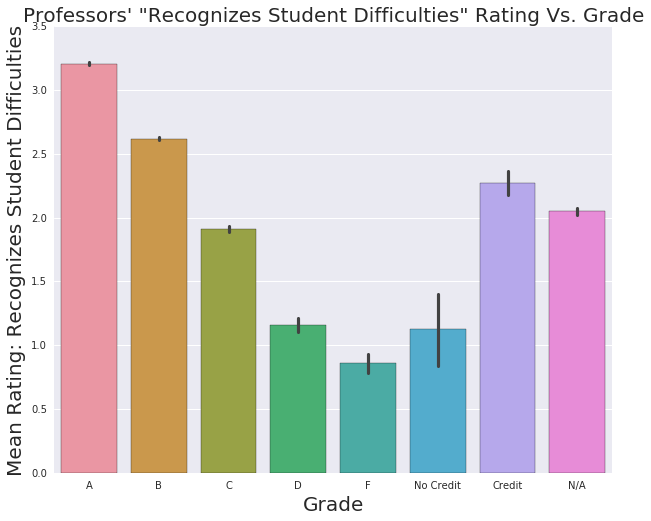

In [17]:
def plot_diffs_ratings():
    '''
        Plots the professors' ratings on 
        'Ability to Recognize Student Difficulties'
            vs.
        'Grade'
    '''
    f_3 = plt.figure()
    f_3.set_size_inches(10, 8, forward=True)

    sns.barplot(reviews_by_grade['Grade'], \
                reviews_by_grade['Recognizes Student Difficulties'], \
                order=order)
    
    plt.xlabel('Grade', fontsize='20')
    
    plt.ylabel('Mean Rating: Recognizes Student Difficulties', \
                fontsize='20')
    
    plt.title('Professors\' \"Recognizes Student Difficulties\" Rating Vs. Grade', \
              fontsize='20')
    
plot_diffs_ratings()

# What about the Estimated Weighted Average Grade Earned by Students For Each Professor?
    Let's add the average (Converted to a [0, 4] scale) and mode grade earned to the professors' DataFrame. 

In [18]:
grades = reviews_by_grade[['prof_id', 'Grade', 'Reporting Evaluations']] 

grades = grades.replace(to_replace=
                        {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0,
                         'Credit': 4, 'No Credit': 0, 'N/A': np.nan})

grades.dropna(inplace=True)
grades.head(16)

,prof_id,Grade,Reporting Evaluations
0,2073,4,13
1,2073,4,13
2,2073,4,13
3,2,3,35
4,12,3,10
5,144,1,4
6,144,1,4
7,144,0,24
8,144,0,24
9,144,0,24


# Merge the Grades DataFrame With the Professors DataFrame using the prof_id as the key.

    * The total evaluations for each professor is logged in the Professors DataFrame
    * The grades and reporting evaluation counts for them are logged 
        in the grades DataFrame
    * Combining these DataFrames helps us find weighted averages.


In [19]:
def merge_dfs(df1, df2, key, suffix_1, suffix_2):
    '''
        Merges two dataframes by similar means.
        Args: 
            df1 (pd.DataFrame): First DataFrame object
            df2 (pd.DataFrame): Second DataFrame object
            key (str): name of pd.Series to use as merge key
            suffix_1: suffix to append to duplicate column's name from df1
            suffix_2: suffix to append to duplicate column's name from df2
    
    '''
    
    return pd.merge(df1, df2, how='outer', left_on=key, right_on=key, \
             suffixes=[suffix_1, suffix_2])

In [20]:
#Get the unique professors in the grades DataFrame
unique_professors = grades['prof_id'].unique()

In [21]:
#Don't run this code more than once, or data will be corrupted.

#Merge the grades and professors DataFrames
grades = merge_dfs(grades, professors, 'prof_id', ' by Grade Earned', ' Total')

grades.head()

,prof_id,Grade,Reporting Evaluations by Grade Earned,Dept,Name,Reporting Evaluations Total
0,2073,4,13,Chemistry and Biochemistry,Christina Abel,32
1,2073,4,13,Chemistry and Biochemistry,Christina Abel,32
2,2073,4,13,Chemistry and Biochemistry,Christina Abel,32
3,2073,4,13,Chemistry and Biochemistry,Christina Abel,32
4,2073,4,13,Chemistry and Biochemistry,Christina Abel,32


## Add a column to represent the estimated weighted average grade of a professor's students.

In [22]:
def calc_average_grades(): 
    '''
        Add a column to represent the estimated weighted average grade of a 
        professor's students. 
        
        Args: None.
        Returns: None.
    
    '''
    
    grades['Average Grade Earned'] = \
        grades['Grade'] * grades['Reporting Evaluations by Grade Earned'] \
        / grades['Reporting Evaluations Total']
    for p in unique_professors:

        rows = grades.loc[grades['prof_id'] == p]

        A = rows.loc[rows['Grade'] == 4]['Average Grade Earned'].max()
        B = rows.loc[rows['Grade'] == 3]['Average Grade Earned'].max()
        C = rows.loc[rows['Grade'] == 2]['Average Grade Earned'].max()
        D = rows.loc[rows['Grade'] == 1]['Average Grade Earned'].max()
        F = rows.loc[rows['Grade'] == 0]['Average Grade Earned'].max()

        percents = np.asarray([A, B, C, D, F])
        percents = percents[~np.isnan(percents)]

        grades.loc[grades.prof_id == p, ['Average Grade Earned']] = np.sum(percents)

In [23]:
calc_average_grades()

### See the results below.

In [24]:
#The Grade no longer matters without the review_id
grades.drop(['Grade'], axis=1, inplace=True) 
display(pd.DataFrame(grades.loc[500]).transpose())

,prof_id,Reporting Evaluations by Grade Earned,Dept,Name,Reporting Evaluations Total,Average Grade Earned
500,2132,18,Communication Studies,Sara Daubert,27,3.11111


Let's save this DataFrame to JSON.


In [25]:
def save_to_json(path, json_str):
    '''
    Saves a DataFrame JSON string to a file.
    Args: path (str): address
    Returns: None.
    '''
    with open(path, 'w') as outfile:
        json.dump(json_str, outfile)
        
grades_json = grades.reset_index().to_json(orient='index') 
save_to_json('/data/primitiveDataType/AverageGrades.json', grades_json)

In [26]:
grade_groups = grades.groupby(['prof_id'])['Average Grade Earned']

In [27]:
grade_groups

In [28]:
ave_grades = grade_groups.value_counts()
print(ave_grades)


prof_id  Average Grade Earned
1        2.823529                 14
2        1.913043                114
4        2.111111                 42
5        2.763158                 79
6        1.742857                 25
7        2.000000                  4
8        1.777778                  7
9        2.200000                  6
11       2.454545                 18
12       2.785714                 23
14       2.184211                 31
17       3.125000                  7
19       2.300000                 14
20       2.933333                 13
21       3.384615                 13
22       2.304348                 52
23       2.600000                 66
25       2.490196                 95
26       3.833333                 12
27       2.585106                 86
28       3.285714                 25
29       2.426230                112
30       2.375000                 21
31       3.153846                 12
32       2.642857                 12
33       2.358140                168
34      

In [29]:
def stripplot(data, x, y, title, x_label, y_label, sort_by=None):
    '''
    Plots the Average Grade earned by each Professor's Students.
    Args: 
        data (pd.DataFrame): holds the data to be plotted
        x (pd.Series): holds the x data
        y (pd.Series): holds the y data
        title (str): title of plot
        x_label (str): Name of x-axis
        y_label (str): Name of y-axis
        sort_by (pd.Series): column by which to sort the categoricals.
        
    Returns:
        None.
    
    '''
    if sort_by != None: 
        data = data.sort_values(by=sort_by, ascending=False)

    f_4 = plt.figure()
    f_4.set_size_inches(10, 8, forward=True)
    plt.xlim([0, 4.1])
    plt.ylim([0, 4.1])

    sns.stripplot(x, y, data=data)
  
    plt.title(title,
               multialignment='left', fontsize='20') 
    plt.xlabel(x_label, fontsize='20')
    plt.ylabel(y_label, fontsize='20')
    

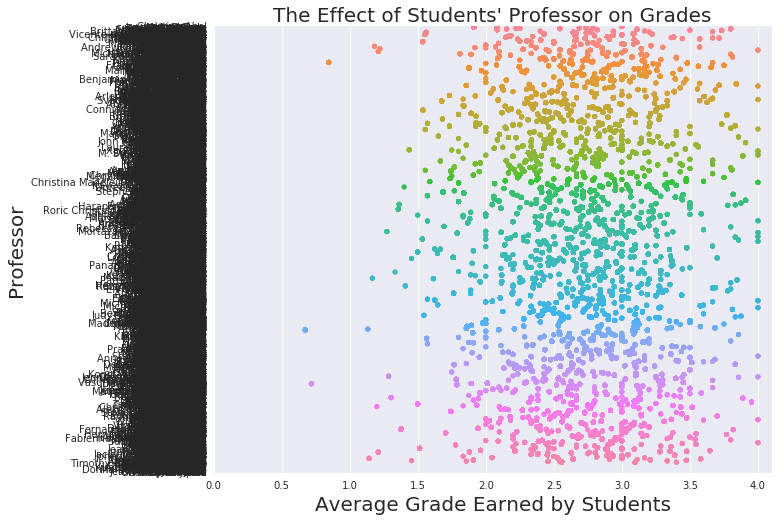

In [30]:
stripplot(grades, grades['Average Grade Earned'], grades['Name'], \
                         'The Effect of Students\' Professor on Grades', \
                         'Average Grade Earned by Students', \
                         'Professor', 'Average Grade Earned')

It looks as though most professors have a habit of passing their students. We can see this by the clustering that centers around students' average grades of around 2.8. 

Just to be sure, let's zoom in on a sample of 30 random professors below.

In [31]:
def plot_average_grades(n=50):
    
    f4 = plt.figure()
    f4.set_size_inches(10, 15, forward=True)
    plt.xlim([0, 4.1])
    plt.ylim([0, 4.1])

    fifty_professors = grades.sample(n=50, replace=False)

    sns.stripplot(x=fifty_professors['Average Grade Earned'], \
                  y=fifty_professors['Name'], \
                  data=fifty_professors, \
                  hue=fifty_professors['Dept'], \
                  orient='h', size=8)

    x_label = 'Average Grade Earned by Students'
    y_label = 'Professor'
    title = 'Cal Poly Professors Vs. Average Grade Earned by Their Students'

    plt.title(title, multialignment='left', fontsize='20') 
    plt.xlabel(x_label, fontsize='20')
    plt.ylabel(y_label, fontsize='20')
    plt.legend(loc='upper left')

    print('Mean of the Average Grade Earned: ', \
          np.mean(fifty_professors['Average Grade Earned']))

In [32]:
interact(plot_average_grades, n=(0, 70), __manual=True)

<function __main__.plot_average_grades>

# Let's see if courses have an effect on a Professor's Ratings.

In [33]:
reviews_by_grade.head(2)

,Course,Grade,Overall Rating,Presents Material Clearly,Recognizes Student Difficulties,Reporting Evaluations,Review,Year,prof_id,review_id
0,CHEM 124,A,3.769,3.769,3.692,13,"To do well in Abel's class, the key is practic...",Freshman,2073,34359
1,CHEM 127,A,3.769,3.769,3.692,13,Great professor! I learned a lot in her class....,Freshman,2073,34176


In [34]:
# merge_dfs(df1, df2, key, suffix_1, suffix_2):
course_groups = merge_dfs(reviews_by_grade, professors, 'prof_id', ' by Grade', ' Total')
course_groups.head()

,Course,Grade,Overall Rating,Presents Material Clearly,Recognizes Student Difficulties,Reporting Evaluations by Grade,Review,Year,prof_id,review_id,Dept,Name,Reporting Evaluations Total
0,CHEM 124,A,3.769,3.769,3.692,13,"To do well in Abel's class, the key is practic...",Freshman,2073,34359,Chemistry and Biochemistry,Christina Abel,32
1,CHEM 127,A,3.769,3.769,3.692,13,Great professor! I learned a lot in her class....,Freshman,2073,34176,Chemistry and Biochemistry,Christina Abel,32
2,CHEM 124,A,3.769,3.769,3.692,13,Dr. Abel is a great chem prof. I would recomme...,Freshman,2073,31660,Chemistry and Biochemistry,Christina Abel,32
3,CHEM 127,A,3.769,3.769,3.692,13,Abel's class is doable but very tedious. Her t...,Sophomore,2073,30100,Chemistry and Biochemistry,Christina Abel,32
4,CHEM 125,A,3.769,3.769,3.692,13,She is an excellent professor. She really pre...,Freshman,2073,29539,Chemistry and Biochemistry,Christina Abel,32


In [35]:
course_groups = reviews_by_grade.groupby(['Course', 'Grade'])

In [36]:
course_groups_df = pd.DataFrame({'count' : course_groups.size()}).reset_index()
course_groups_df.head()

,Course,Grade,count
0,AERO 101,A,1
1,AERO 101,N/A,1
2,AERO 102,A,1
3,AERO 102,B,1
4,AERO 120,A,1


In [37]:
course_groups['Overall Rating'].first()

Course    Grade 
AERO 101  A         4.000
          N/A       1.833
AERO 102  A         3.415
          B         3.333
AERO 120  A         3.857
AERO 121  A         3.667
          B         3.000
          N/A       3.000
AERO 131  B         3.889
AERO 133  B         0.167
AERO 201  A         2.780
AERO 208  D         0.000
AERO 210  A         3.415
AERO 215  N/A       2.000
AERO 219  A         2.647
AERO 241  C         2.250
AERO 265  B         2.000
AERO 300  A         2.000
          B         2.111
          D         4.000
          F         2.000
          N/A       2.667
AERO 301  A         2.889
          B         1.800
          C         3.200
          N/A       2.000
AERO 302  A         3.500
          B         3.889
          D         0.000
          N/A       1.667
                    ...  
ZOO 323   A         3.500
          B         2.167
          N/A       2.000
ZOO 329   A         2.800
ZOO 331   A         4.000
          B         3.429
          C         0

In [38]:
course_groups['Presents Material Clearly'].first()

Course    Grade 
AERO 101  A         4.000
          N/A       1.833
AERO 102  A         3.561
          B         3.333
AERO 120  A         3.786
AERO 121  A         3.000
          B         2.667
          N/A       3.000
AERO 131  B         3.667
AERO 133  B         0.167
AERO 201  A         2.829
AERO 208  D         1.000
AERO 210  A         3.561
AERO 215  N/A       1.500
AERO 219  A         2.412
AERO 241  C         2.250
AERO 265  B         1.833
AERO 300  A         2.750
          B         2.444
          D         4.000
          F         2.000
          N/A       2.667
AERO 301  A         2.889
          B         1.800
          C         3.200
          N/A       2.333
AERO 302  A         3.167
          B         3.667
          D         0.000
          N/A       1.333
                    ...  
ZOO 323   A         3.000
          B         2.167
          N/A       2.000
ZOO 329   A         2.600
ZOO 331   A         4.000
          B         3.714
          C         0

In [39]:
course_groups['Recognizes Student Difficulties'].first()

Course    Grade 
AERO 101  A         4.000
          N/A       2.333
AERO 102  A         3.244
          B         3.111
AERO 120  A         3.679
AERO 121  A         3.167
          B         2.667
          N/A       3.000
AERO 131  B         3.556
AERO 133  B         0.333
AERO 201  A         2.659
AERO 208  D         0.000
AERO 210  A         3.244
AERO 215  N/A       2.000
AERO 219  A         2.235
AERO 241  C         2.000
AERO 265  B         2.167
AERO 300  A         1.500
          B         1.778
          D         4.000
          F         1.000
          N/A       2.000
AERO 301  A         2.889
          B         1.800
          C         3.200
          N/A       2.333
AERO 302  A         3.000
          B         3.556
          D         0.000
          N/A       2.000
                    ...  
ZOO 323   A         3.000
          B         2.167
          N/A       2.000
ZOO 329   A         2.800
ZOO 331   A         4.000
          B         3.286
          C         0

In [40]:
course_groups_df.head()


,Course,Grade,count
0,AERO 101,A,1
1,AERO 101,N/A,1
2,AERO 102,A,1
3,AERO 102,B,1
4,AERO 120,A,1


In [41]:
merged_courses = merge_dfs(reviews_by_grade, professors, 'prof_id', ' by Grade', ' Total')
merged_courses.dropna(inplace=True)
merged_courses.head()

,Course,Grade,Overall Rating,Presents Material Clearly,Recognizes Student Difficulties,Reporting Evaluations by Grade,Review,Year,prof_id,review_id,Dept,Name,Reporting Evaluations Total
0,CHEM 124,A,3.769,3.769,3.692,13,"To do well in Abel's class, the key is practic...",Freshman,2073,34359,Chemistry and Biochemistry,Christina Abel,32
1,CHEM 127,A,3.769,3.769,3.692,13,Great professor! I learned a lot in her class....,Freshman,2073,34176,Chemistry and Biochemistry,Christina Abel,32
2,CHEM 124,A,3.769,3.769,3.692,13,Dr. Abel is a great chem prof. I would recomme...,Freshman,2073,31660,Chemistry and Biochemistry,Christina Abel,32
3,CHEM 127,A,3.769,3.769,3.692,13,Abel's class is doable but very tedious. Her t...,Sophomore,2073,30100,Chemistry and Biochemistry,Christina Abel,32
4,CHEM 125,A,3.769,3.769,3.692,13,She is an excellent professor. She really pre...,Freshman,2073,29539,Chemistry and Biochemistry,Christina Abel,32


In [94]:
# #unique_courses = merged_courses[['Course', 'prof_id']]
# m = merged_courses.groupby(['prof_id', 'Course'])
# m.first()
# m = m.agg(lambda x: x.value_counts().index[0])

# modes = pd.DataFrame({'stuff': m}, index = range(len(m)))
# modes
temp = merged_courses.loc[merged_courses['Course'].str.contains('CHEM 124')]
unique_prof_by_this_course = temp.prof_id.unique()
for p in unique_prof_by_this_course:
    t = temp.loc[merged_courses['prof_id'] == p]
    print(t)
    print('Count: ', t.count()[0])

      Course Grade  Overall Rating  Presents Material Clearly  \
0   CHEM 124     A           3.769                      3.769   
2   CHEM 124     A           3.769                      3.769   
7   CHEM 124     B           3.222                      3.222   
8   CHEM 124     B           3.222                      3.222   
10  CHEM 124     B           3.222                      3.222   
11  CHEM 124     B           3.222                      3.222   
12  CHEM 124     A           3.769                      3.769   
13  CHEM 124     B           3.222                      3.222   
16  CHEM 124     C           3.750                      3.750   
17  CHEM 124     C           3.750                      3.750   
21  CHEM 124     C           3.750                      3.750   
26  CHEM 124     A           3.769                      3.769   
27  CHEM 124     A           3.769                      3.769   
31  CHEM 124     A           3.769                      3.769   

    Recognizes Student D

## Visualizations
Below are more explorations of the possible visualizations that can be produced with this DataSet

In [42]:
assert np.nan not in merged_courses.Course.unique()

In [43]:
staley = merged_courses.loc[merged_courses['Name'].str.contains('Clint Staley')]

In [44]:
granger = merged_courses.loc[merged_courses['Name'].str.contains('Brian Granger')]

In [45]:
art = merged_courses.loc[merged_courses['Course'].str.contains('ART')]

In [46]:
dehktyar = merged_courses.loc[merged_courses['Name'].str.contains('Alex Dekhtyar')]
dehktyar1 = merged_courses.loc[merged_courses['Name'].str.contains('alexander dekhtyar')]
dehktyar2 = merged_courses.loc[merged_courses['Name'].str.contains('alex dekhtyar')]
dehktyar3 = merged_courses.loc[merged_courses['Name'].str.contains('Aleks Dekhtyar')]
dehktyar = pd.concat([dehktyar, dehktyar1, dehktyar2, dehktyar3])

In [47]:
frame = merged_courses.loc[merged_courses['Name'].str.contains('Frame')]

In [48]:
stat_dept = merged_courses.loc[merged_courses['Dept'].str.contains('Statistics')]

In [50]:
wilson = merged_courses.loc[merged_courses['Name'].str.contains('Jonathan Wilson')]

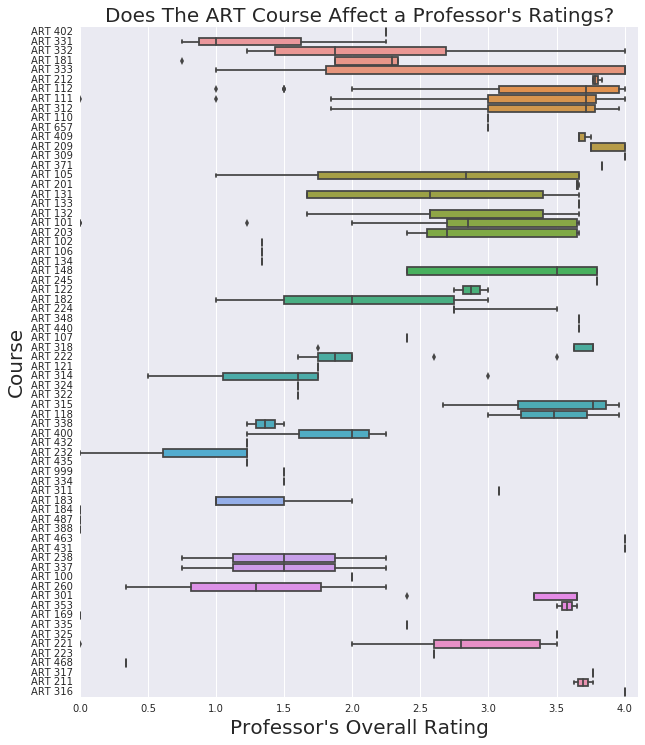

In [843]:
f_5 = plt.figure()
f_5.set_size_inches(10, 12, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = art
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Professor\'s Overall Rating'
title = 'Does The ART Course Affect a Professor\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

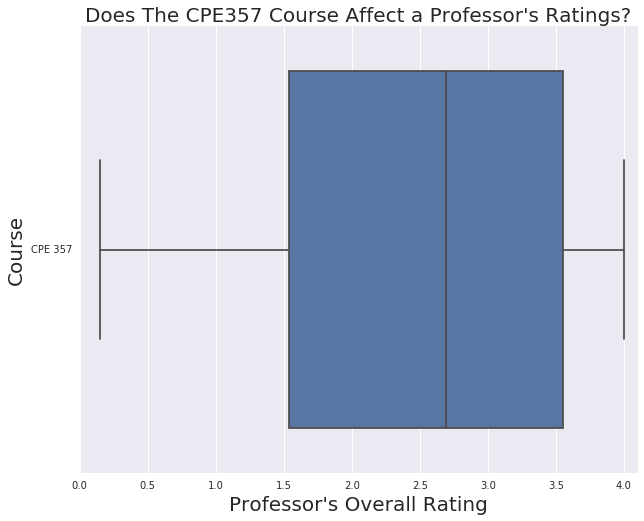

In [799]:
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = cpe357
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Professor\'s Overall Rating'
title = 'Does The CPE357 Course Affect a Professor\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

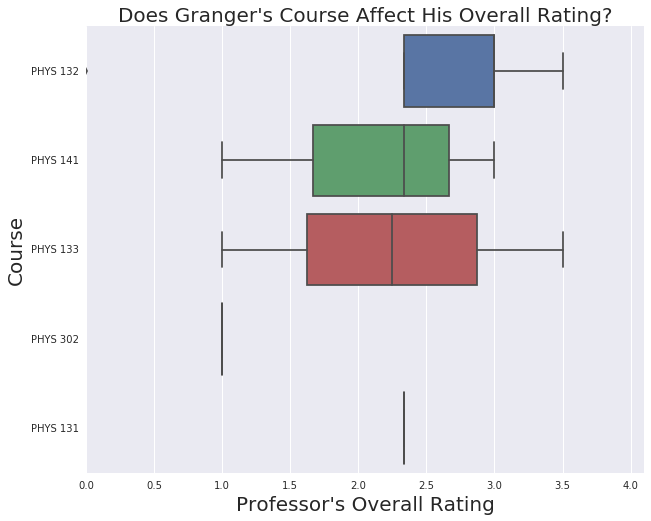

In [815]:
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = granger
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Professor\'s Overall Rating'
title = 'Does Granger\'s Course Affect His Overall Rating?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

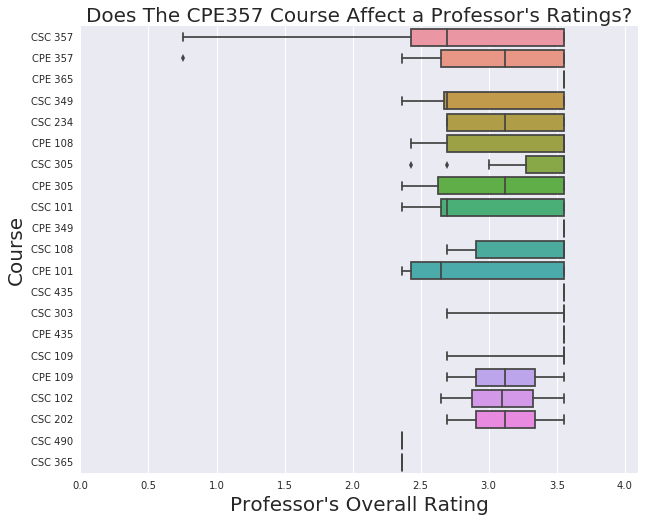

In [812]:
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = staley
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Professor\'s Overall Rating'
title = 'Does The CPE357 Course Affect a Professor\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

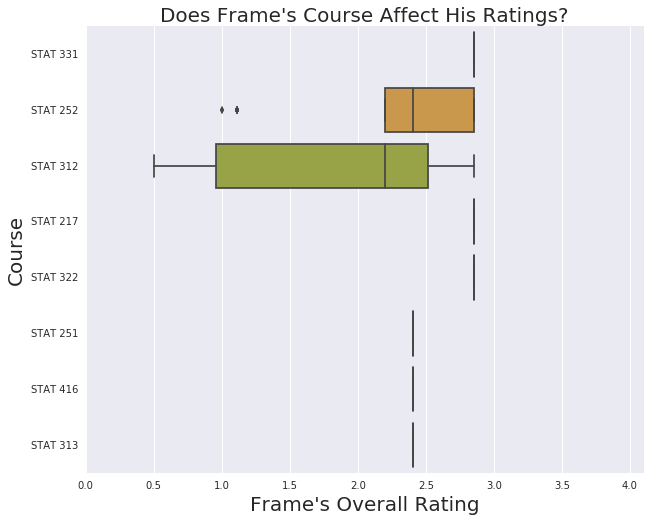

In [817]:
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = frame
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Frame\'s Overall Rating'
title = 'Does Frame\'s Course Affect His Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

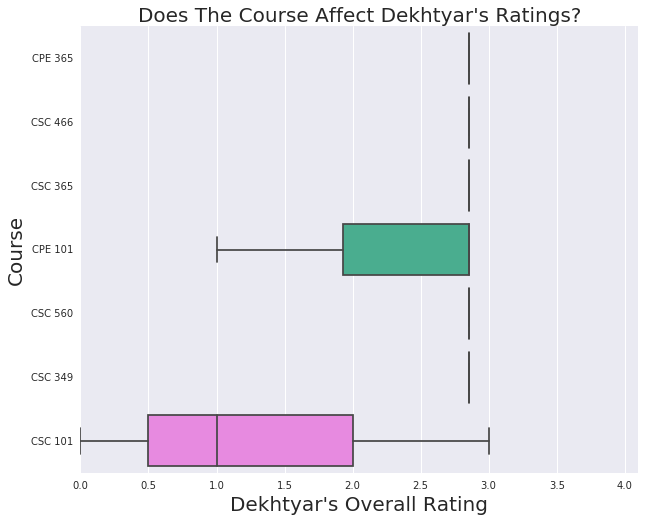

In [837]:
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = dehktyar
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Dekhtyar\'s Overall Rating'
title = 'Does The Course Affect Dekhtyar\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

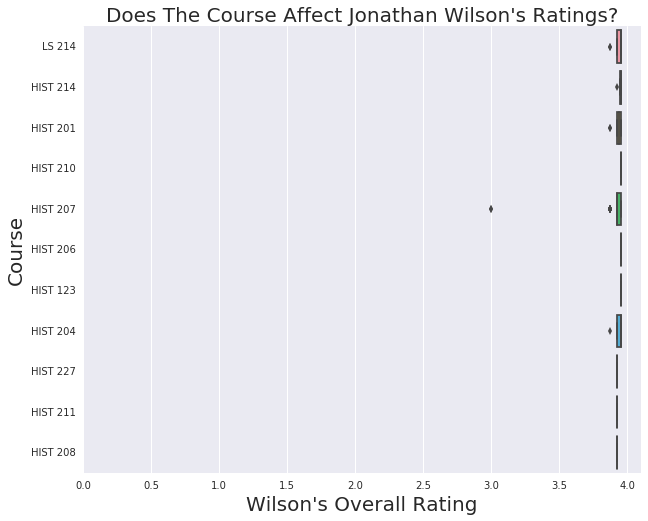

In [52]:
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = wilson
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Wilson\'s Overall Rating'
title = 'Does The Course Affect Jonathan Wilson\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

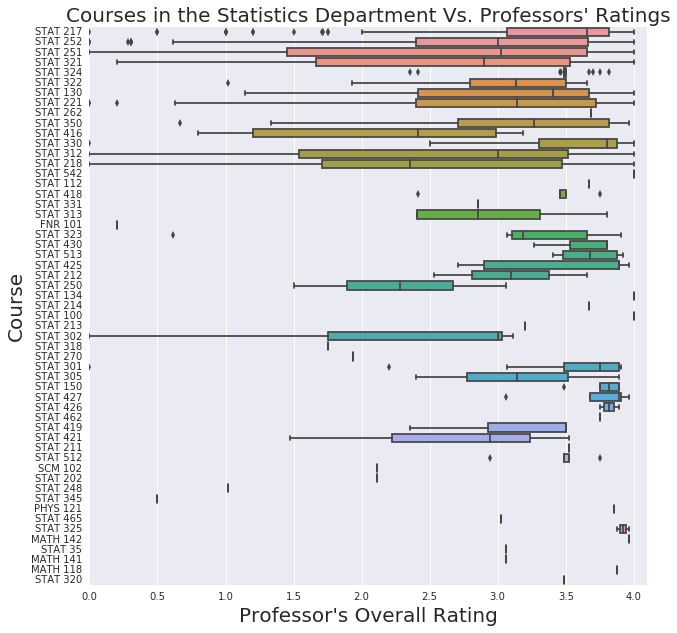

In [841]:
f_5 = plt.figure()
f_5.set_size_inches(10, 10, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = stat_dept
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Professor\'s Overall Rating'
title = 'Courses in the Statistics Department Vs. Professors\' Ratings'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

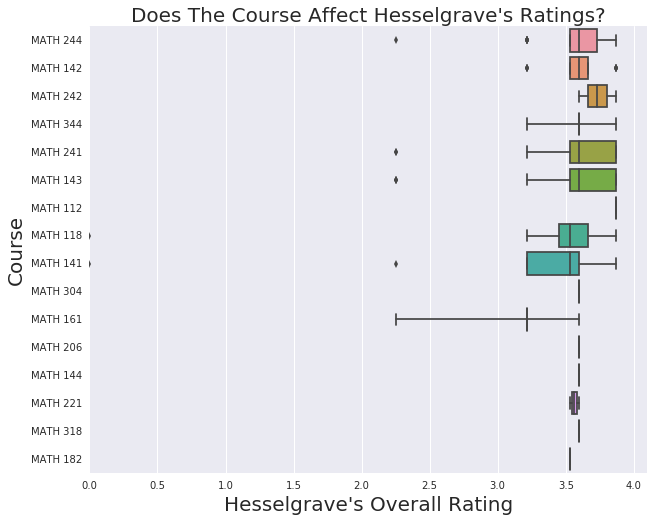

In [55]:
hesselgrave = merged_courses.loc[merged_courses['Name'].str.contains('Hesselgrave')]
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = hesselgrave
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Hesselgrave\'s Overall Rating'
title = 'Does The Course Affect Hesselgrave\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

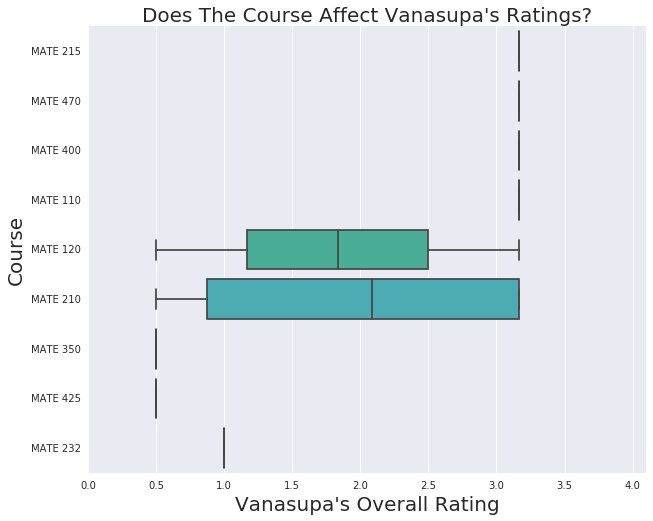

In [56]:
Vanasupa = merged_courses.loc[merged_courses['Name'].str.contains('Vannasupa')]
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = Vanasupa
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Vanasupa\'s Overall Rating'
title = 'Does The Course Affect Vanasupa\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')


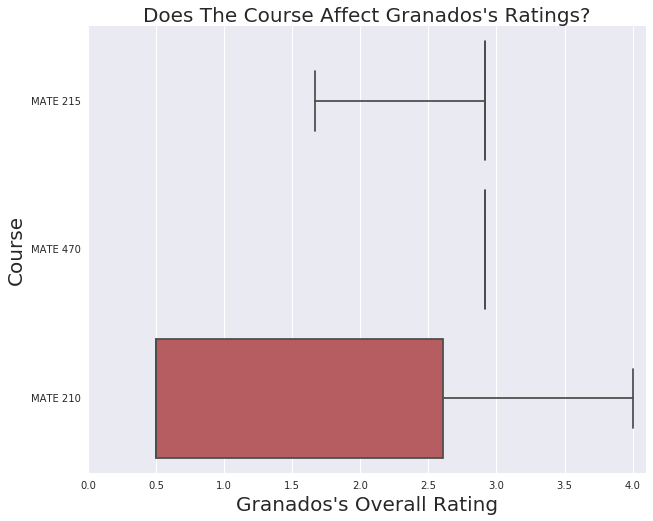

In [57]:
Granados = merged_courses.loc[merged_courses['Name'].str.contains('Granados')]
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = Granados
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Granados\'s Overall Rating'
title = 'Does The Course Affect Granados\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

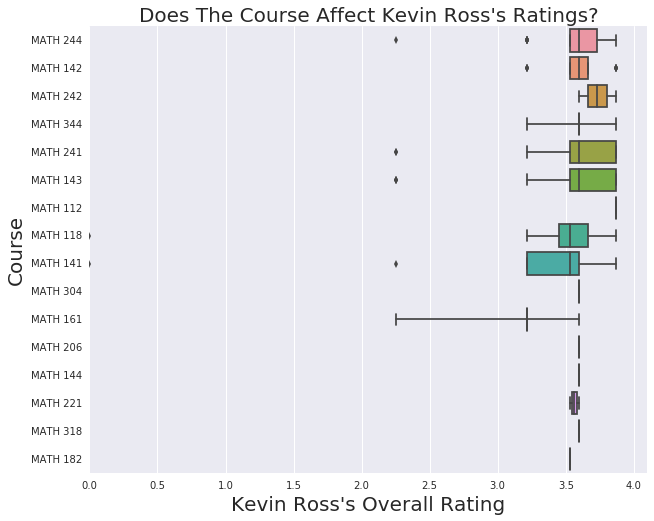

In [58]:
kevin_ross = merged_courses.loc[merged_courses['Name'].str.contains('Kevin Ross')]
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = hesselgrave
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Kevin Ross\'s Overall Rating'
title = 'Does The Course Affect Kevin Ross\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

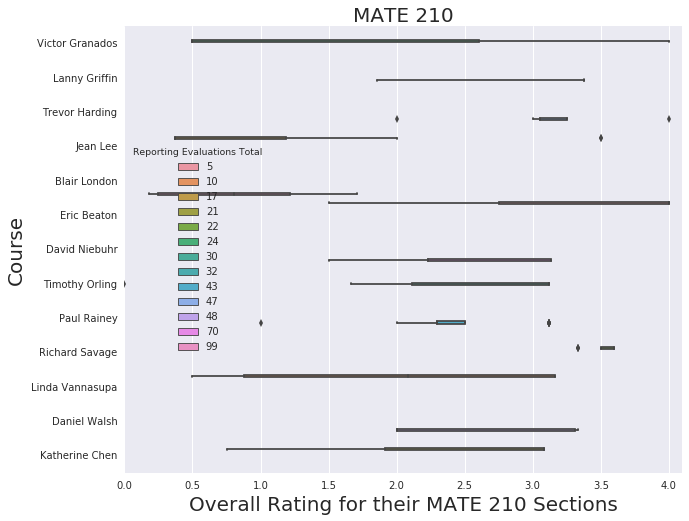

In [65]:
MATE_210 = merged_courses.loc[merged_courses['Course'].str.contains('MATE 210')]

f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = MATE_210
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Name'], data=thirty_p_courses, hue=thirty_p_courses['Reporting Evaluations Total'])

y_label = 'Course'
x_label = 'Overall Rating for their MATE 210 Sections'
title = 'MATE 210'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

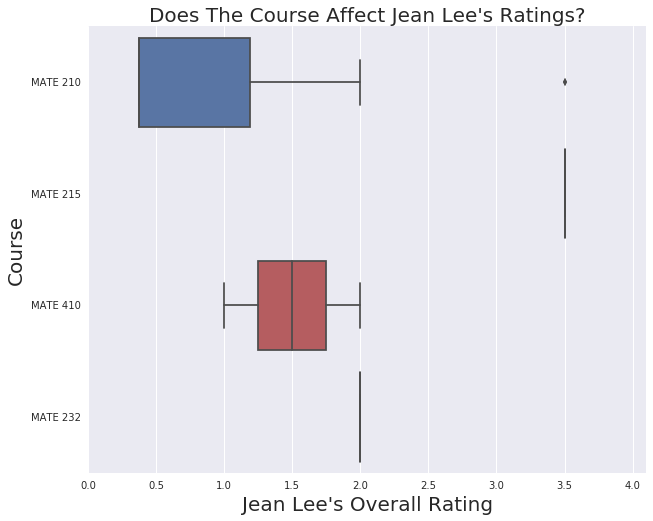

In [63]:
jean_lee = merged_courses.loc[merged_courses['Name'].str.contains('Jean Lee')]
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = jean_lee
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Jean Lee\'s Overall Rating'
title = 'Does The Course Affect Jean Lee\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')

In [ ]:
jean_lee = merged_courses.loc[merged_courses['Name'].str.contains('Jean Lee')]
f_5 = plt.figure()
f_5.set_size_inches(10, 8, forward=True)
plt.xlim([0, 4.1])
plt.ylim([0, 4.1])

thirty_p_courses = jean_lee
sns.boxplot(x=thirty_p_courses['Overall Rating'], \
            y=thirty_p_courses['Course'], data=thirty_p_courses)

y_label = 'Course'
x_label = 'Jean Lee\'s Overall Rating'
title = 'Does The Course Affect Jean Lee\'s Ratings?'
plt.title(title, multialignment='left', fontsize='20') 
plt.xlabel(x_label, fontsize='20')
plt.ylabel(y_label, fontsize='20')